# Exploratory Data Analysis - Shopee Text Data

I will be diving into the Shopee text data to find patterns. The goal will also be to have do some feature engineering for clusttering the similar products by text. 

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re

from sklearn.feature_extraction.text import CountVectorizer

## Load data

In [2]:
df_train = pd.read_csv('../data/train.csv')

In [3]:
df_train.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [4]:
df_train.dtypes

posting_id     object
image          object
image_phash    object
title          object
label_group     int64
dtype: object

In [5]:
# examine one title
df_train['title'][1]

'Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DOUBLE FOAM TAPE'

### EDA of Titles

In [6]:
#Creating a new column call title lenghth
for i in range(len(df_train)):
    df_train.loc[i,'title_length'] = len(df_train.iloc[i,3])

In [7]:
#Creating a new column called title word count
for i in range(len(df_train)):
    df_train.loc[i,'title_word_count'] = len(re.findall(r'\w+', df_train.iloc[i,3]))

### Longest and shortest Title

In [8]:
#5 Longest Title
df_train.loc[:,['title','title_word_count']].sort_values(by=['title_word_count']).tail(5)

,title,title_word_count
20702,Soft Case Silikon Motif Kartun Beruang Warna P...,60.0
24451,Soft Case TPU Motif We Bare Bears Lucu dengan ...,60.0
24448,Case Motif Kartun Beruang Lucu dengan Stand un...,60.0
17755,Silicone Case Premium Realme 7 7i 5i C15 C12 C...,61.0
26678,Mukena Bali Polos Rayon Janger Jumbo rample Ad...,82.0


In [20]:
#5 shortest Title
df_train.loc[:,['title','title_word_count']].sort_values(by=['title_word_count']).head(50)

,title,title_word_count
3528,Merries,1.0
14852,Freshcare,1.0
7539,HERBADIABS,1.0
16329,ORCHID,1.0
9683,BEAUSLIM,1.0
29427,Gamis,1.0
4009,fullo,1.0
14880,HIMALAYA,1.0
26141,Bendera,1.0
7741,KACAMATA,1.0


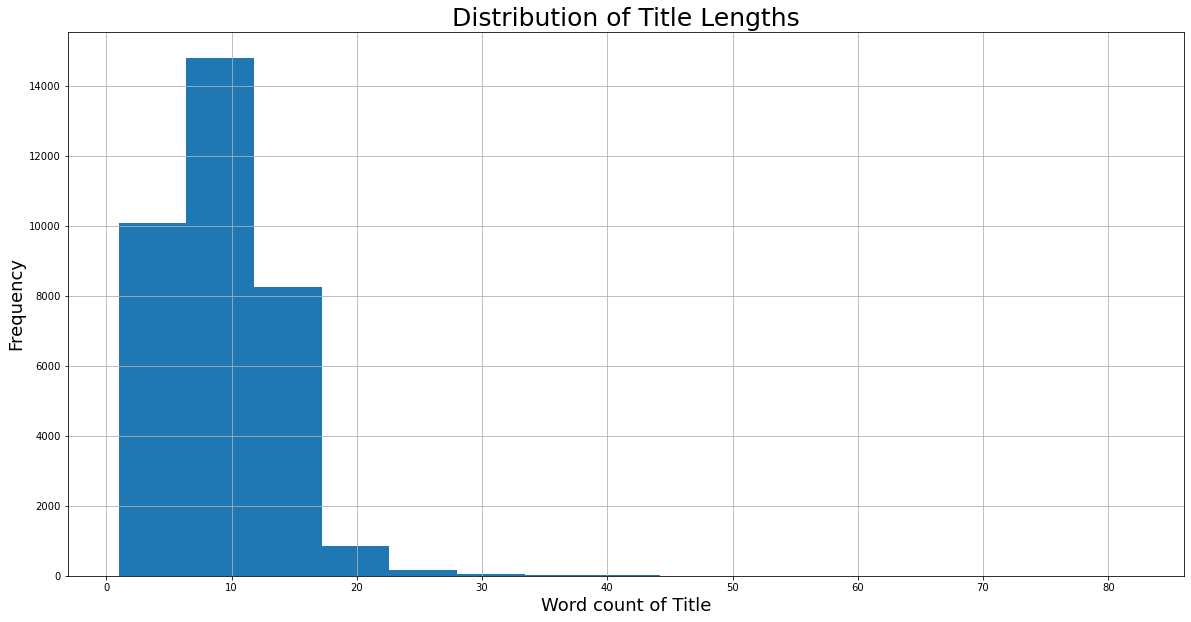

In [10]:
plt.figure(figsize=(20,10))
df_train['title_word_count'].hist(bins=15)
plt.title('Distribution of Title Lengths', fontsize=25)
plt.xlabel('Word count of Title', fontsize=18)
plt.ylabel('Frequency', fontsize=18);

### Mean Count of Title word count

In [11]:
# Short Title mean
df_train.groupby('label_group')[['title_word_count']].mean().sort_values('title_word_count').head(25)

,title_word_count
label_group,
2727489300,1.000000
2734689090,1.000000
2514750348,1.000000
673158714,1.333333
2326564207,1.500000
2813625930,1.500000
176983345,2.000000
1964914740,2.000000
265293477,2.000000


In [12]:
# long Title mean
df_train.groupby('label_group')[['title_word_count']].mean().sort_values('title_word_count').tail(25)

,title_word_count
label_group,
1081076968,27.500000
1557471785,28.500000
3536454240,29.500000
1062995067,29.666667
2494069768,30.000000
3902280490,30.500000
2947227311,30.500000
3470043457,31.500000
2245089637,31.666667


In [13]:
df_train.groupby('label_group')[['title_word_count']].mean().sort_values('title_word_count')

,title_word_count
label_group,
2727489300,1.000000
2734689090,1.000000
2514750348,1.000000
673158714,1.333333
2326564207,1.500000
...,...
3679224078,41.500000
138930320,43.500000
905946020,43.500000


In [14]:
cv = CountVectorizer()
X = cv.fit_transform(df_train['title'])

In [15]:
X_df = pd.DataFrame(X.toarray(),
                         columns=cv.get_feature_names())

In [16]:
X_df.head()

,00,000,0000,0003,0005,000mah,000mcg,000mg,000ml,001,...,zuvia,zuzhu,zv,zwits,zwitsal,zwitsbaby,zwitzal,zxid,zy,zyo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Frequent Word

In [17]:
top_words = {}

for i in X_df.columns:
    top_words[i] =  X_df[i].sum()
    
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

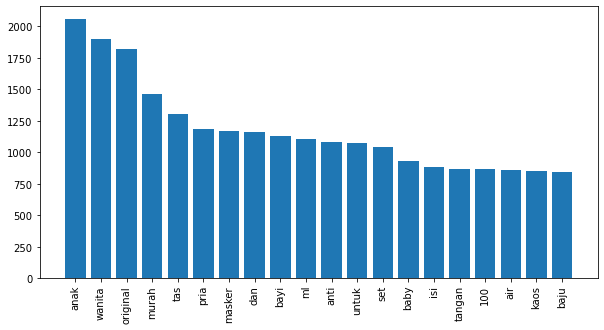

In [18]:
plt.figure(figsize = (10, 5))

# visualize top 25 words
plt.bar(most_freq[0][:20], most_freq[1][:20])
plt.xticks(rotation=90);

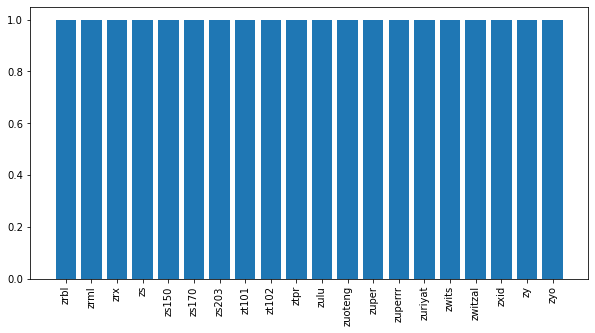

In [19]:
plt.figure(figsize = (10, 5))

# visualize the last 20 words
plt.bar(most_freq[0][-20:], most_freq[1][-20:])
plt.xticks(rotation=90);

### Frequent Words Dive

